In [6]:
import ffn 
import matplotlib as pyplot
import numpy as np
import pandas as pd
import datetime as dt
from empyrical import alpha_beta
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import discrete_allocation
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices
from pandas_datareader import data
%matplotlib inline
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

In [7]:
#Calculate beta of each stock in the Dow Jones 30
price = list()
benchmark = ffn.get('spy', start='2016-11-01',end='2018-11-01')
names = ['mmm','axp','aapl','ba','cat','cvx','csco','ko', 'xom','gs','hd','ibm','intc','jnj','jpm','mcd','mrk','msft','nke','pfe','pg','trv','unh','utx','vz','v','wmt','wba','dis']
for i in names:
    
    temp = ffn.get(i, start='2016-11-01',end='2018-11-01')
    price.append(temp)
    alpha, beta = alpha_beta(temp, benchmark)
    print('name: ',i,'\tbeta value: ',beta)

C:\Users\samra\Anaconda3\lib\site-packages\empyrical\stats.py:1294: RuntimeWarning: overflow encountered in power
  out=out


name:  mmm 	beta value:  0.6166690496672075
name:  axp 	beta value:  0.49324124956658455
name:  aapl 	beta value:  1.2814752120237054
name:  ba 	beta value:  3.338177801341278
name:  cat 	beta value:  0.9865648747460943
name:  cvx 	beta value:  0.30497004172699455
name:  csco 	beta value:  0.2583288771674521
name:  ko 	beta value:  0.08051303787606492
name:  xom 	beta value:  0.031170028583297853
name:  gs 	beta value:  0.31360330199716613
name:  hd 	beta value:  1.0575558680664585
name:  ibm 	beta value:  -0.11748307706015737
name:  intc 	beta value:  0.2664495498066668
name:  jnj 	beta value:  0.3017684323440961
name:  jpm 	beta value:  0.5479576051769822
name:  mcd 	beta value:  0.6851956588427172
name:  mrk 	beta value:  0.06132061138922086
name:  msft 	beta value:  0.7293870878877612
name:  nke 	beta value:  0.4103539452328578
name:  pfe 	beta value:  0.14542335785963392
name:  pg 	beta value:  -0.03549027606365109
name:  trv 	beta value:  0.29758504608502334
name:  unh 	beta valu

Text(0,0.5,'price in $')

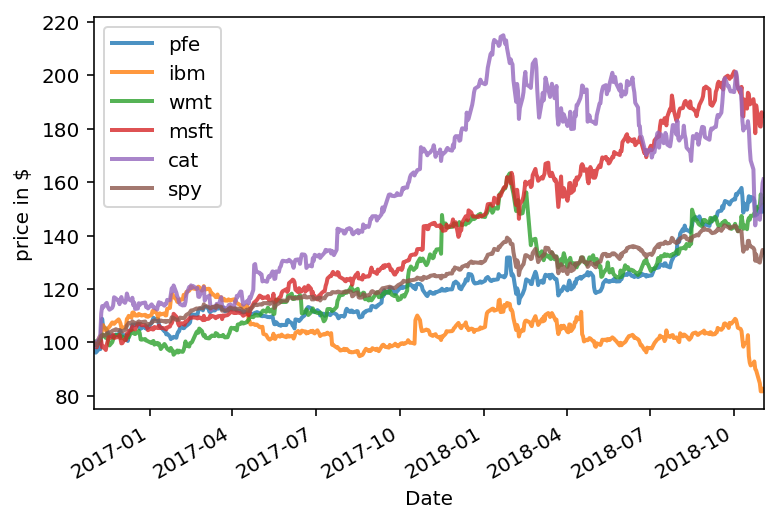

In [8]:
#Stock selection is made! Top five stocks for our portfolio
#Plot of each stock to show price evolution within the given time frame including the benchmark
prices1 = ffn.get('pfe,ibm,wmt,msft,cat,spy', start='2016-11-01', end='2018-11-01')
prices = ffn.get('pfe,ibm,wmt,msft,cat', start='2016-11-01', end='2018-11-01')
benchmark = ffn.get('spy', start='2016-11-01')
ax = prices1.rebase().plot(lw=2, alpha=0.8)
plt.ylabel('price in $')

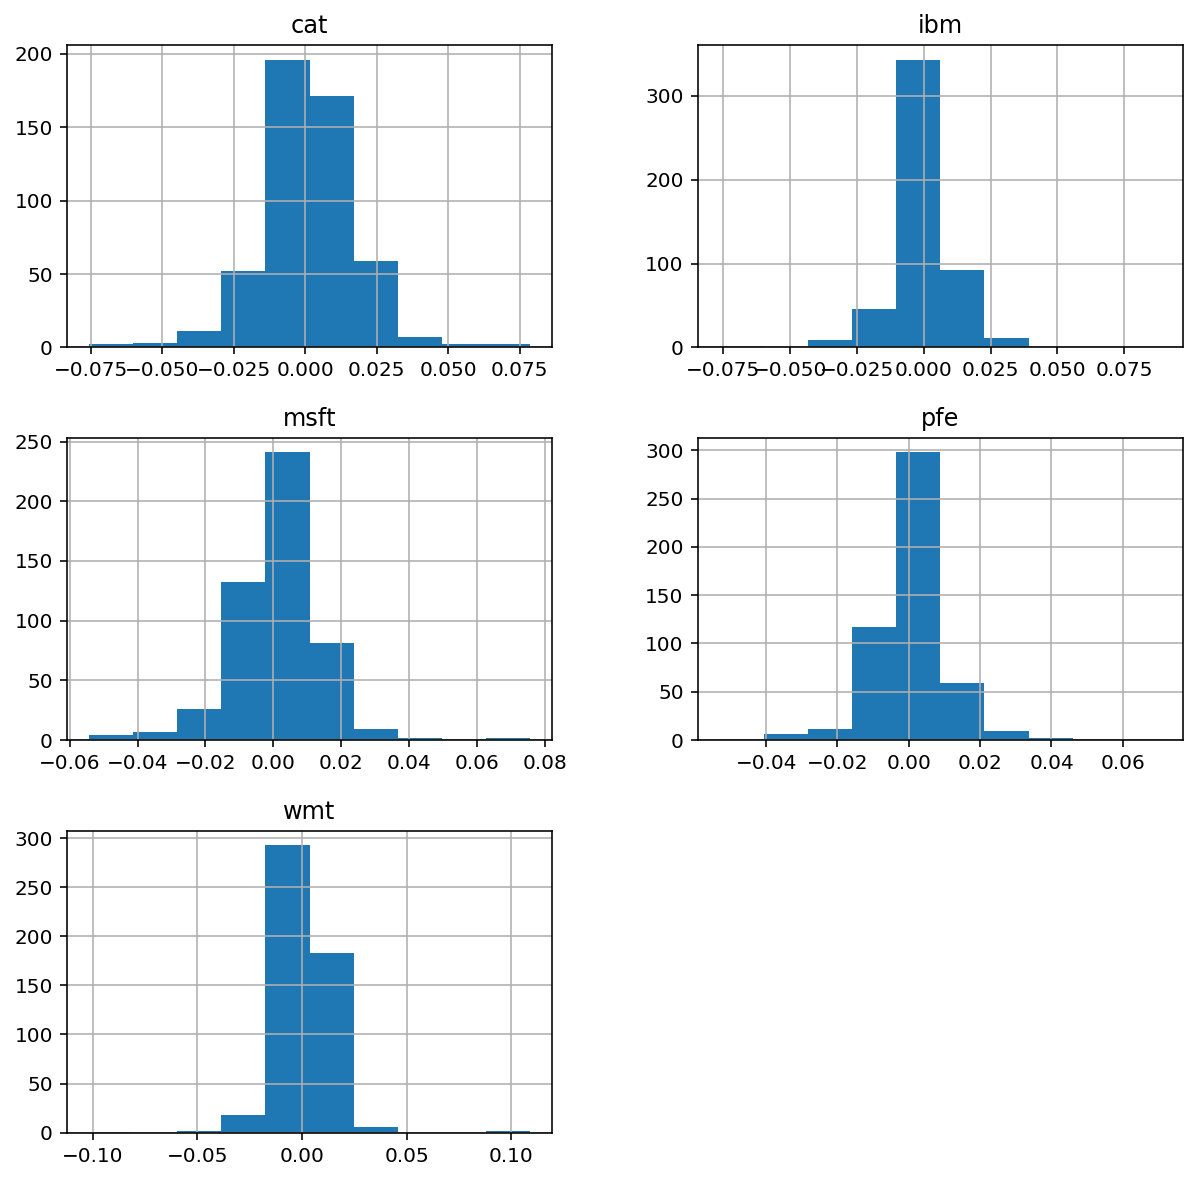

In [9]:
returns = prices.to_returns().dropna()
ax = returns.hist(figsize=(10,10))

In [10]:
#Report of some important performance matrix
stats = prices.calc_stats()
stats.display()

C:\Users\samra\Anaconda3\lib\site-packages\ffn\core.py:2056: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)


Stat                 pfe         ibm         wmt         msft        cat
-------------------  ----------  ----------  ----------  ----------  ----------
Start                2016-11-01  2016-11-01  2016-11-01  2016-11-01  2016-11-01
End                  2018-11-02  2018-11-02  2018-11-02  2018-11-02  2018-11-02
Risk-free rate       0.00%       0.00%       0.00%       0.00%       0.00%

Total Return         49.07%      -18.10%     53.83%      85.08%      61.09%
Daily Sharpe         1.30        -0.42       1.15        1.60        1.05
Daily Sortino        2.21        -0.62       1.95        2.72        1.72
CAGR                 22.08%      -9.49%      24.01%      36.01%      26.90%
Max Drawdown         -13.01%     -32.54%     -23.86%     -11.50%     -33.10%
Calmar Ratio         1.70        -0.29       1.01        3.13        0.81

MTD                  -0.30%      0.21%       1.06%       -0.61%      3.68%
3m                   8.27%       -18.22%     14.84%      -0.93%      -8.27%
6m      

In [11]:
#Calculate beta value for each stock choice
price = list()
benchmark = ffn.get('spy', start='2016-11-01',end='2018-11-01')
names = ['pfe','ibm','wmt','msft','cat']
for i in names:
    
    temp = ffn.get(i, start='2016-11-01',end='2018-11-01')
    price.append(temp)
    alpha, beta = alpha_beta(temp, benchmark)
    print('name: ',i,'\tbeta value: ',beta)

name:  pfe 	beta value:  0.14542335785963392
name:  ibm 	beta value:  -0.11748307706015737
name:  wmt 	beta value:  0.4300338521121386
name:  msft 	beta value:  0.7293870878877612
name:  cat 	beta value:  0.9865648747460943


In [12]:
# Expected returns and sample covariance
mu = expected_returns.mean_historical_return(prices)
S = risk_models.sample_cov(prices)
#Minimum volatility. May be useful if you're trying to get an idea of how low the volatility could be, 
#but in practice it makes a lot more sense to me to use the portfolio that maximises the Sharpe ratio.
# Optimise portfolio for maximum Sharpe Ratio to serve as benchmark
ef = EfficientFrontier(mu, S)
raw_weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights() 
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

{'pfe': 0.26419, 'ibm': 0.0, 'wmt': 0.2568, 'msft': 0.42678, 'cat': 0.05223}
Expected annual return: 27.1%
Annual volatility: 13.9%
Sharpe Ratio: 1.81


(0.2711053123030498, 0.13898948383733048, 1.8066497217655446)

In [13]:
# Expected returns and sample covariance
mu = expected_returns.mean_historical_return(prices)
S = risk_models.sample_cov(prices)
#Minimum volatility. May be useful if you're trying to get an idea of how low the volatility could be, 
#but in practice it makes a lot more sense to me to use the portfolio that maximises the Sharpe ratio.
# Optimise portfolio for maximum Sharpe Ratio to serve as benchmark
ef = EfficientFrontier(mu, S)
raw_weights = ef.min_volatility() #ef.max_sharpe()
cleaned_weights = ef.clean_weights() 
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

{'pfe': 0.3606, 'ibm': 0.22088, 'wmt': 0.23008, 'msft': 0.16456, 'cat': 0.02389}
Expected annual return: 17.4%
Annual volatility: 12.7%
Sharpe Ratio: 1.21


(0.1736669204869989, 0.12678844114593588, 1.2119947141721332)

In [14]:
#To achieve beta neutrality
ef = EfficientFrontier(mu, S, weight_bounds=(-1, 1))
ef.efficient_return(target_return=0.2, market_neutral=True)

{'pfe': 0.0715653728132859,
 'ibm': -0.5396245533036399,
 'wmt': 0.09662027756007492,
 'msft': 0.3091565484880527,
 'cat': 0.06228235444222637}

In [15]:
#The result of market neutral optimisation is essentially a long and short portfolio. 
#We normalize the results as weights as shown below
weights = ef.efficient_return(target_return=0.2, market_neutral=True)
weight_sum = sum(w for w in weights.values() if w > 0)
normalised_weights = {k:v/weight_sum for k,v in weights.items()}
normalised_weights

{'pfe': 0.13262067556999574,
 'ibm': -1.0,
 'wmt': 0.17905092896265584,
 'msft': 0.572910455232926,
 'cat': 0.11541794023442235}

In [16]:
#We then need to convert these weights into an actual allocation, telling you how many shares of each asset you should purchase.
latest_prices = get_latest_prices(prices)
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=1000000)
allocation, leftover = da.lp_portfolio()
print(allocation)
print("Funds remaining: ${:.2f}".format(leftover))

0 out of 5 tickers were removed

Allocating long sub-portfolio:
0 out of 4 tickers were removed

Allocating short sub-portfolio:
0 out of 1 tickers were removed
{'pfe': 3229, 'wmt': 1813, 'msft': 5500, 'cat': 943, 'ibm': -2752}
Funds remaining: $77.36


In [17]:
latest_prices

pfe      41.076160
ibm     108.987953
wmt      98.789253
msft    104.163193
cat     122.322792
Name: 2018-11-02 00:00:00, dtype: float64

In [18]:
prices2 = ffn.get('pfe,ibm,wmt,msft,cat', start='2018-11-01', end='2018-12-01')
latest_prices2 = get_latest_prices(prices2)

In [19]:
latest_prices2

pfe      44.574997
ibm     118.582451
wmt      95.192131
msft    109.274261
cat     131.930450
Name: 2018-11-30 00:00:00, dtype: float64

In [20]:
sum1 = 0
for key,val in allocation.items():
    sum1 = sum1 - (latest_prices[key]*val)
print(sum1)
new = 0
for key,val in allocation.items():
    new = new + (latest_prices2[key]*val)
    sum1 = sum1 + (latest_prices2[key]*val)
print(new)
print(sum1)

-700052.9440040588
715595.9468154907
15543.002811431885


In [21]:
def calc(stockStartTime,stockEndTime):
    #calculating 2 years prior of the start date
    tempdate = dt.datetime.fromisoformat(stockStartTime)
    tempdate = tempdate - dt.timedelta(weeks=104)
    prices = ffn.get('pfe,ibm,wmt,msft,cat', start= tempdate.strftime('%Y-%m-%d'), end=stockStartTime)
    # Expected returns and sample covariance
    mu = expected_returns.mean_historical_return(prices)
    S = risk_models.sample_cov(prices)
    #Minimum volatility. May be useful if you're trying to get an idea of how low the volatility could be, 
    #but in practice it makes a lot more sense to me to use the portfolio that maximises the Sharpe ratio.
    # Optimise portfolio for maximum Sharpe Ratio to serve as benchmark
    ef = EfficientFrontier(mu, S)
    raw_weights = ef.min_volatility() #ef.max_sharpe()
    cleaned_weights = ef.clean_weights() 
    print("Cleaned weights:\n",cleaned_weights)
    print("Portfolio Performance:\n",ef.portfolio_performance(verbose=True))
    #To achieve beta neutrality
    ef = EfficientFrontier(mu, S, weight_bounds=(-1, 1))
    print(" Weights: ",ef.efficient_return(target_return=0.15, market_neutral=True))
    weights = ef.efficient_return(target_return=0.2, market_neutral=True)
    weight_sum = sum(w for w in weights.values() if w > 0)
    normalised_weights = {k:v/weight_sum for k,v in weights.items()}
    #print("Normalized weights: ",normalised_weights)
    #We then need to convert these weights into an actual allocation, telling you how many shares of each asset you should purchase.
    latest_prices = get_latest_prices(prices)
    da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=1000000)
    allocation, leftover = da.lp_portfolio()
    #print(allocation)
    print("")
    for key,val in allocation.items():
        print("Number of positions in ",key," stock: ",val)
    print("")
    print("Funds remaining: ${:.2f}".format(leftover))
    print("")
    prices2 = ffn.get('pfe,ibm,wmt,msft,cat', start=stockStartTime, end=stockEndTime)
    latest_prices2 = get_latest_prices(prices2)
    sum1 = 0
    for key,val in allocation.items():
        sum1 = sum1 - (latest_prices[key]*val)
    print("Value of Portfolio after short sales :\t",abs(sum1))
    new = 0
    for key,val in allocation.items():
        new = new + (latest_prices2[key]*val)
        sum1 = sum1 + (latest_prices2[key]*val)
    print("Value at end of period :\t\t",new)
    print("Profit at end of time period :\t\t",sum1)
    return sum1

In [22]:
calc(stockStartTime = "2018-11-01",stockEndTime = "2018-12-01")

Cleaned weights:
 {'pfe': 0.36653, 'ibm': 0.21878, 'wmt': 0.22718, 'msft': 0.16404, 'cat': 0.02347}
Expected annual return: 18.3%
Annual volatility: 12.7%
Sharpe Ratio: 1.28
Portfolio Performance:
 (0.18256989382586908, 0.12675995933515896, 1.2825019405065212)
 Weights:  {'pfe': 0.07780753417839327, 'ibm': -0.40095262697007006, 'wmt': 0.057495506014782254, 'msft': 0.22245907360138628, 'cat': 0.04319051317550822}
0 out of 5 tickers were removed

Allocating long sub-portfolio:
0 out of 4 tickers were removed

Allocating short sub-portfolio:
0 out of 1 tickers were removed

Number of positions in  pfe  stock:  4933
Number of positions in  wmt  stock:  1239
Number of positions in  msft  stock:  5424
Number of positions in  cat  stock:  899
Number of positions in  ibm  stock:  -2752

Funds remaining: $87.22

Value of Portfolio after short sales :	 700043.0845222473
Value at end of period :		 722801.6747055054
Profit at end of time period :		 22758.590183258057


22758.590183258057

In [23]:
calc(stockStartTime = "2018-12-01",stockEndTime = "2019-01-01")

Cleaned weights:
 {'pfe': 0.44155, 'ibm': 0.20499, 'wmt': 0.21502, 'msft': 0.11353, 'cat': 0.02491}
Expected annual return: 18.5%
Annual volatility: 12.8%
Sharpe Ratio: 1.29
Portfolio Performance:
 (0.18472737263571107, 0.12761192957084685, 1.2908461864786607)
 Weights:  {'pfe': 0.09986221454374912, 'ibm': -0.40326456472872, 'wmt': 0.03864721908752407, 'msft': 0.2532999814550717, 'cat': 0.011455149642375095}
0 out of 5 tickers were removed

Allocating long sub-portfolio:
0 out of 4 tickers were removed

Allocating short sub-portfolio:
0 out of 1 tickers were removed

Number of positions in  pfe  stock:  5508
Number of positions in  wmt  stock:  1017
Number of positions in  msft  stock:  5754
Number of positions in  cat  stock:  219
Number of positions in  ibm  stock:  -2529

Funds remaining: $118.63

Value of Portfolio after short sales :	 700091.3313903809
Value at end of period :		 644985.262550354
Profit at end of time period :		 -55106.068840026855


-55106.068840026855

In [24]:
calc(stockStartTime = "2019-01-01",stockEndTime = "2019-02-01")

Cleaned weights:
 {'pfe': 0.48307, 'ibm': 0.20787, 'wmt': 0.21761, 'msft': 0.07258, 'cat': 0.01886}
Expected annual return: 13.2%
Annual volatility: 13.7%
Sharpe Ratio: 0.82
Portfolio Performance:
 (0.13245341739230287, 0.13722349618164242, 0.8194909801995465)
 Weights:  {'pfe': 0.08154191922058279, 'ibm': -0.4056520092146714, 'wmt': 0.0746382449192475, 'msft': 0.22376620198814146, 'cat': 0.025705643086699696}
0 out of 5 tickers were removed

Allocating long sub-portfolio:
0 out of 4 tickers were removed

Allocating short sub-portfolio:
0 out of 1 tickers were removed

Number of positions in  pfe  stock:  4786
Number of positions in  wmt  stock:  1854
Number of positions in  msft  stock:  5653
Number of positions in  cat  stock:  549
Number of positions in  ibm  stock:  -2728

Funds remaining: $117.67

Value of Portfolio after short sales :	 700065.4560317993
Value at end of period :		 663973.0623245239
Profit at end of time period :		 -36092.39370727539


-36092.39370727539

In [32]:
def totalret(startDate):
    tempdate = dt.datetime.fromisoformat(startDate)
    monthend = tempdate + dt.timedelta(days=30)
    print("monthend:",monthend)
    total = 0
    monthlyRet = list()
    percentage = list()
    for i in range(12):
        print("\n\n********************",tempdate.strftime('%d %b %Y'),"***********************\n\n")
        ret = calc( stockStartTime = tempdate.strftime('%Y-%m-%d') , stockEndTime = monthend.strftime('%Y-%m-%d'))
        monthlyRet.append(ret)
        total = total + ret
        tempdate = tempdate + dt.timedelta(days=30)
        print("temp:",tempdate)
        monthend = monthend + dt.timedelta(days=30)
        print("monthend:",monthend)
        i = i + 1
    print("\n")
    for i in monthlyRet:
        print("Returns per time period: ${:.2f}".format(i),"\tReturns in percentage:", i/1000000)
    print("\n\n\n*************The total return for 1 year : ", total,"******************")

In [33]:
totalret("2018-11-01")

monthend: 2018-12-01 00:00:00


******************** 01 Nov 2018 ***********************


Cleaned weights:
 {'pfe': 0.36653, 'ibm': 0.21878, 'wmt': 0.22718, 'msft': 0.16404, 'cat': 0.02347}
Expected annual return: 18.3%
Annual volatility: 12.7%
Sharpe Ratio: 1.28
Portfolio Performance:
 (0.18256989382586908, 0.12675995933515896, 1.2825019405065212)
 Weights:  {'pfe': 0.07780753417839327, 'ibm': -0.40095262697007006, 'wmt': 0.057495506014782254, 'msft': 0.22245907360138628, 'cat': 0.04319051317550822}
0 out of 5 tickers were removed

Allocating long sub-portfolio:
0 out of 4 tickers were removed

Allocating short sub-portfolio:
0 out of 1 tickers were removed

Number of positions in  pfe  stock:  4933
Number of positions in  wmt  stock:  1239
Number of positions in  msft  stock:  5424
Number of positions in  cat  stock:  899
Number of positions in  ibm  stock:  -2752

Funds remaining: $87.22

Value of Portfolio after short sales :	 700043.0845222473
Value at end of period :		 722801.67


Number of positions in  wmt  stock:  1850
Number of positions in  msft  stock:  5993
Number of positions in  pfe  stock:  -970
Number of positions in  ibm  stock:  -1604
Number of positions in  cat  stock:  -318

Funds remaining: $88.67

Value of Portfolio after short sales :	 699971.1767654419
Value at end of period :		 727326.3788375854
Profit at end of time period :		 27355.202072143555
temp: 2019-07-29 00:00:00
monthend: 2019-08-28 00:00:00


******************** 29 Jul 2019 ***********************


Cleaned weights:
 {'pfe': 0.40125, 'ibm': 0.19795, 'wmt': 0.30808, 'msft': 0.06358, 'cat': 0.02914}
Expected annual return: 16.4%
Annual volatility: 14.9%
Sharpe Ratio: 0.96
Portfolio Performance:
 (0.16395401804655574, 0.1494565553732759, 0.963183031262983)
 Weights:  {'pfe': -0.19770879356826698, 'ibm': -0.29321630374935936, 'wmt': 0.10823334981227109, 'msft': 0.52674976352234, 'cat': -0.14405801601698467}
0 out of 5 tickers were removed

Allocating long sub-portfolio:
0 out of 2 ti

In [27]:
calc(stockStartTime = "2019-01-30",stockEndTime = "2019-03-31")

Cleaned weights:
 {'pfe': 0.46364, 'ibm': 0.19429, 'wmt': 0.26062, 'msft': 0.06971, 'cat': 0.01174}
Expected annual return: 16.3%
Annual volatility: 14.2%
Sharpe Ratio: 1.01
Portfolio Performance:
 (0.16279296787387068, 0.14184990861890312, 1.0066482894782909)
 Weights:  {'pfe': 0.05041531046242584, 'ibm': -0.4512160899106538, 'wmt': 0.10565266184407578, 'msft': 0.26965566701852334, 'cat': 0.02549245058562888}
0 out of 5 tickers were removed

Allocating long sub-portfolio:
0 out of 4 tickers were removed

Allocating short sub-portfolio:
0 out of 1 tickers were removed

Number of positions in  pfe  stock:  2691
Number of positions in  wmt  stock:  2499
Number of positions in  msft  stock:  5807
Number of positions in  cat  stock:  434
Number of positions in  ibm  stock:  -2338

Funds remaining: $129.68

Value of Portfolio after short sales :	 700089.5561065674
Value at end of period :		 773147.4195022583
Profit at end of time period :		 73057.86339569092


73057.86339569092